In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

import warnings 
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('census income project')
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [3]:
df.shape

(32560, 15)

In [4]:
categorical_features=df.select_dtypes(include=[np.object])
categorical_features.head()

,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Native_country,Income
0,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
1,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
2,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
3,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
4,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,United-States,<=50K


In [5]:
numerical_features=df.select_dtypes(include=[np.number])
numerical_features.head()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
0,50,83311,13,0,0,13
1,38,215646,9,0,0,40
2,53,234721,7,0,0,40
3,28,338409,13,0,0,40
4,37,284582,14,0,0,40


<AxesSubplot:xlabel='Income', ylabel='count'>

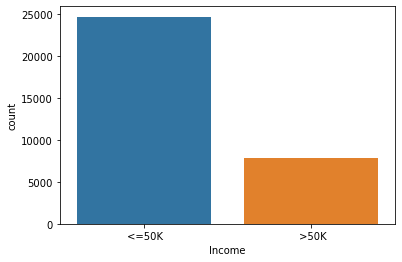

In [6]:
sn.countplot(df['Income'])

In [7]:
# target data is imbalanced so will balance it

In [8]:
df['Income'].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

# EDA

In [9]:
# finding relationship between income and other features

<AxesSubplot:xlabel='count', ylabel='Workclass'>

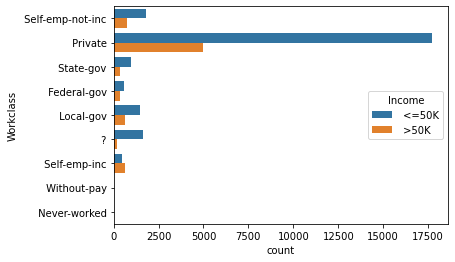

In [10]:
sn.countplot(y='Workclass',hue='Income',data=df,)

In [11]:
df['Workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Education'>

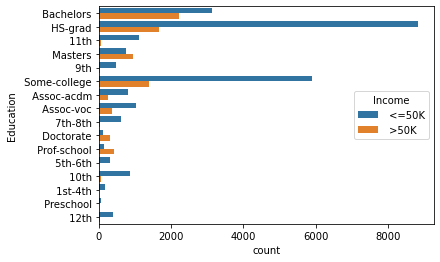

In [12]:
sn.countplot(y='Education',hue='Income',data=df)

<AxesSubplot:xlabel='count', ylabel='Occupation'>

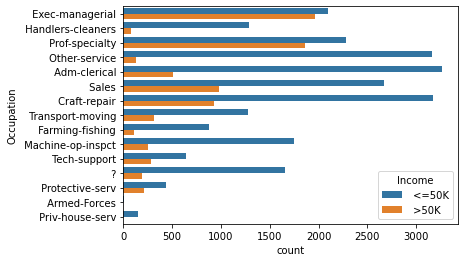

In [13]:
sn.countplot(y='Occupation',hue='Income',data=df)

In [14]:
df['Education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64

In [15]:
df['Occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Sex'>

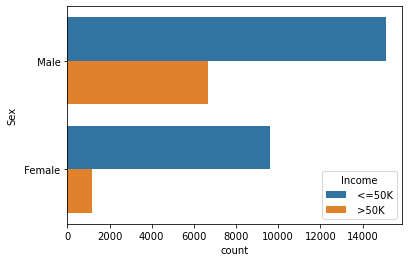

In [16]:
sn.countplot(y='Sex',hue='Income',data=df)

In [17]:
df['Sex'].value_counts()

 Male      21789
 Female    10771
Name: Sex, dtype: int64

In [18]:
df['Marital_status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64

In [19]:
df['Race'].value_counts()

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64

In [20]:
df['Relationship'].value_counts()

 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64

In [21]:
df['Native_country'].value_counts()

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [22]:
# in native country there is ? need to address it

In [23]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [24]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [25]:
# don't have null values

In [26]:
# converting categorical values into numeric


from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()

df['Workclass']=LE.fit_transform(df['Workclass'])
df['Education']=LE.fit_transform(df['Education'])
df['Marital_status']=LE.fit_transform(df['Education'])
df['Occupation']=LE.fit_transform(df['Occupation'])
df['Relationship']=LE.fit_transform(df['Relationship'])
df['Race']=LE.fit_transform(df['Race'])
df['Sex']=LE.fit_transform(df['Sex'])
df['Income']=LE.fit_transform(df['Income'])
df['Native_country']=LE.fit_transform(df['Native_country'])

In [27]:
df.describe()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
count,32560.000000,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,3.868796,1.897818e+05,10.298249,10.080590,10.298249,6.572912,1.446376,3.665848,0.669195,1077.615172,87.306511,40.437469,36.718796,0.240817
std,13.640642,1.455879,1.055498e+05,3.870317,2.572709,3.870317,4.228809,1.606794,0.848817,0.470510,7385.402999,402.966116,12.347618,7.823892,0.427586
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,4.000000,1.178315e+05,9.000000,9.000000,9.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,39.000000,0.000000
50%,37.000000,4.000000,1.783630e+05,11.000000,10.000000,11.000000,7.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,39.000000,0.000000
75%,48.000000,4.000000,2.370545e+05,12.000000,12.000000,12.000000,10.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,39.000000,0.000000
max,90.000000,8.000000,1.484705e+06,15.000000,16.000000,15.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000,1.000000


In [28]:
cor=df.corr()

In [29]:
cor

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.003786,-0.076646,-0.010508,0.036527,-0.010508,-0.020946,-0.263698,0.028718,0.088832,0.077674,0.057775,0.068756,-0.001151,0.234039
Workclass,0.003786,1.000000,-0.016587,0.023537,0.052015,0.023537,0.255004,-0.090449,0.049720,0.095942,0.033828,0.012231,0.138974,-0.007710,0.051645
Fnlwgt,-0.076646,-0.016587,1.000000,-0.028156,-0.043159,-0.028156,0.001554,0.008922,-0.021278,0.026882,0.000437,-0.010259,-0.018770,-0.051957,-0.009481
Education,-0.010508,0.023537,-0.028156,1.000000,0.359172,1.000000,-0.021274,-0.010879,0.014135,-0.027349,0.030047,0.016744,0.055510,0.064291,0.079311
Education_num,0.036527,0.052015,-0.043159,0.359172,1.000000,0.359172,0.109748,-0.094145,0.031825,0.012256,0.122627,0.079932,0.148127,0.050831,0.335182
Marital_status,-0.010508,0.023537,-0.028156,1.000000,0.359172,1.000000,-0.021274,-0.010879,0.014135,-0.027349,0.030047,0.016744,0.055510,0.064291,0.079311
Occupation,-0.020946,0.255004,0.001554,-0.021274,0.109748,-0.021274,1.000000,-0.075620,0.006779,0.080328,0.025511,0.017979,0.080384,-0.012532,0.075448
Relationship,-0.263698,-0.090449,0.008922,-0.010879,-0.094145,-0.010879,-0.075620,1.000000,-0.116052,-0.582453,-0.057918,-0.061064,-0.248975,-0.005504,-0.250924
Race,0.028718,0.049720,-0.021278,0.014135,0.031825,0.014135,0.006779,-0.116052,1.000000,0.087197,0.011143,0.018902,0.041910,0.137849,0.071853
Sex,0.088832,0.095942,0.026882,-0.027349,0.012256,-0.027349,0.080328,-0.582453,0.087197,1.000000,0.048477,0.045572,0.229312,-0.008125,0.215995


<AxesSubplot:>

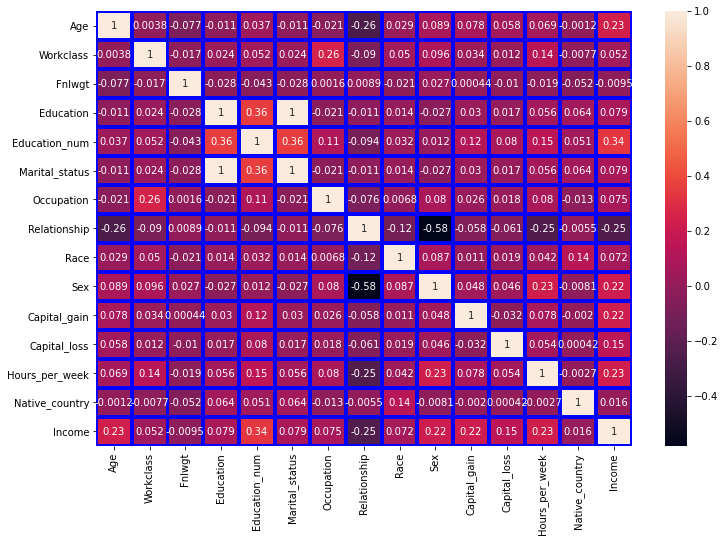

In [30]:
plt.figure(figsize=(12,8))
sn.heatmap(cor,annot=True,linewidth=3,linecolor='blue')

In [31]:
collist=df.columns.values
ncol=15
nrows=10

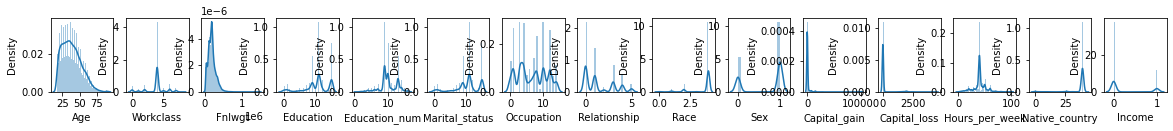

In [32]:
# snapshot of distribution curves of all input datas

plt.figure(figsize=(20,16))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sn.distplot(df[collist[i]])

Age                  AxesSubplot(0.125,0.657941;0.133621x0.222059)
Workclass         AxesSubplot(0.285345,0.657941;0.133621x0.222059)
Fnlwgt             AxesSubplot(0.44569,0.657941;0.133621x0.222059)
Education         AxesSubplot(0.606034,0.657941;0.133621x0.222059)
Education_num     AxesSubplot(0.766379,0.657941;0.133621x0.222059)
Marital_status       AxesSubplot(0.125,0.391471;0.133621x0.222059)
Occupation        AxesSubplot(0.285345,0.391471;0.133621x0.222059)
Relationship       AxesSubplot(0.44569,0.391471;0.133621x0.222059)
Race              AxesSubplot(0.606034,0.391471;0.133621x0.222059)
Sex               AxesSubplot(0.766379,0.391471;0.133621x0.222059)
Capital_gain            AxesSubplot(0.125,0.125;0.133621x0.222059)
Capital_loss         AxesSubplot(0.285345,0.125;0.133621x0.222059)
Hours_per_week        AxesSubplot(0.44569,0.125;0.133621x0.222059)
Native_country       AxesSubplot(0.606034,0.125;0.133621x0.222059)
Income               AxesSubplot(0.766379,0.125;0.133621x0.222

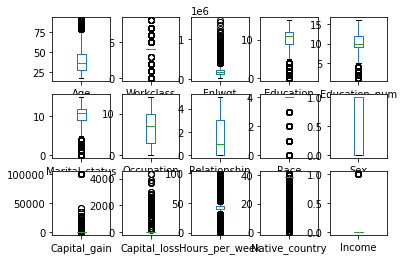

In [33]:
df.plot(kind='box',subplots=True,layout=(3,5))

In [34]:
df.skew()

Age                0.558738
Workclass         -0.752280
Fnlwgt             1.446972
Education         -0.934063
Education_num     -0.311630
Marital_status    -0.934063
Occupation         0.114540
Relationship       0.786784
Race              -2.435332
Sex               -0.719244
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
Native_country    -3.658235
Income             1.212383
dtype: float64

In [35]:
# to standardise the data using standard scaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaledx=scaler.fit_transform(df)

In [36]:
scaledx=df

In [37]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6,83311,9,13,9,4,0,4,1,0,0,13,39,0
1,38,4,215646,11,9,11,6,1,4,1,0,0,40,39,0
2,53,4,234721,1,7,1,6,0,2,1,0,0,40,39,0
3,28,4,338409,9,13,9,10,5,2,0,0,0,40,5,0
4,37,4,284582,12,14,12,4,5,4,0,0,0,40,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4,257302,7,12,7,13,5,4,0,0,0,38,39,0
32556,40,4,154374,11,9,11,7,0,4,1,0,0,40,39,1
32557,58,4,151910,11,9,11,1,4,4,0,0,0,40,39,0
32558,22,4,201490,11,9,11,1,3,4,1,0,0,20,39,0


In [38]:
# correcting by dropping capital gain,capital loss and relationship,since won't affect much on prediction


df=df.drop('Capital_gain',axis=1)
df=df.drop('Capital_loss',axis=1)
df=df.drop('Relationship',axis=1)

In [39]:
# to remove outliers from dataset

from scipy.stats import zscore
z=np.abs(zscore(df))
new_df=df[(z<3).all(axis=1)]

In [40]:
df.shape,new_df.shape

((32560, 12), (28913, 12))

In [41]:
#since only 11% data loss considering outlier removal

In [42]:
#Model building and training

x=new_df.drop('Income',axis=1)
y=new_df['Income']

In [43]:
# since dataset is imbalanced, treating it with random over sampling

In [44]:
import imblearn

In [46]:
from imblearn.over_sampling import RandomOverSampler
ros=RandomOverSampler(random_state=42)
x_ros,y_ros=ros.fit_resample(x,y)

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [51]:
lm=LogisticRegression()

In [52]:
x_ros_train,x_ros_test,y_ros_train,y_ros_test=train_test_split(x_ros,y_ros,test_size=0.2,random_state=40)

In [53]:
from sklearn.tree import DecisionTreeClassifier
maxAccu=0
maxRs=0
for i in range(1,200):
    x_ros_train,x_ros_test,y_ros_train,y_ros_test = train_test_split(x_ros,y_ros,test_size=.30,random_state=i)
    mod=DecisionTreeClassifier()
    mod.fit(x_ros_train,y_ros_train)
    pred=mod.predict(x_ros_test)
    acc=accuracy_score(y_ros_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRs=i
print("best accuracy is",maxAccu,"on random_state",maxRs)

best accuracy is 0.8815338963706916 on random_state 8


In [54]:
x_ros_train,x_ros_test,y_ros_train,y_ros_test=train_test_split(x_ros,y_ros,test_size=0.2,random_state=8)

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [56]:
DTC=DecisionTreeClassifier()
DTC.fit(x_ros_train,y_ros_train)
pred=DTC.predict(x_ros_test)
acc=accuracy_score(y_ros_test,pred)
print(acc)

0.889408810773796


In [57]:
RFC=RandomForestClassifier()
RFC.fit(x_ros_train,y_ros_train)
pred=RFC.predict(x_ros_test)
acc=accuracy_score(y_ros_test,pred)
print(acc)

0.9125770372061173


In [58]:
sv=SVC()
sv.fit(x_ros_train,y_ros_train)
pred=sv.predict(x_ros_test)
acc=accuracy_score(y_ros_test,pred)
print(acc)

0.5160922163889523


In [59]:
# Cross Validation application

from sklearn.model_selection import cross_val_score

In [60]:
print(cross_val_score(DTC,x_ros,y_ros,cv=5).mean())

0.8942664598437062


In [61]:
print(cross_val_score(RFC,x_ros,y_ros,cv=5).mean())

0.9118201578184907


In [62]:
print(cross_val_score(sv,x_ros,y_ros,cv=5).mean())

0.5212745363763652


In [63]:
# Hyperparameter tuning for random forest

from sklearn.model_selection import GridSearchCV

In [64]:
parameters={'n_estimators':[100],
           'max_features':['auto','sqrt'],
           'max_depth':[4,5,6,7,8],
           'criterion':['gini','entropy']}

In [65]:
GCV_RF=GridSearchCV(RandomForestClassifier(),parameters,cv=5)
GCV_RF.fit(x_ros_train,y_ros_train)
GCV_RF.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'sqrt',
 'n_estimators': 100}

In [66]:
RF_mod=RandomForestClassifier(criterion='gini',max_depth=8,max_features='sqrt',n_estimators=100)
RF_mod.fit(x_ros_train,y_ros_train)
pred=RF_mod.predict(x_ros_test)
print(accuracy_score(y_ros_test,pred)*100)

77.95023967130791


In [67]:
# Saving The Model

import joblib
joblib.dump(RF_mod,"censusincomeprediction.pkl")

['censusincomeprediction.pkl']

In [68]:
#Conclusion- found random forest model is with higher sufficiency